In [1]:
#from datetime import datetime

import pandas as pd

#from FACTOID.get_subreddits import most_active_subreddits

# Loading graph from files

In [3]:
df=pd.read_csv('reddit_dataset.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'reddit_dataset.csv'

In [6]:
df.head()

,Unnamed: 0,user_id,fake_news_spreader,documents,amounts,embedding_file,rn_amounts,fn_amounts,fn_rn_ratio,annotation,...,4605,4606,4607,4608,4609,4610,4611,4612,4613,4614
0,0,ddf62a134f09db7a6056190d594bd41ff2f4cf04faf5db...,0,"[('gloapg3', ""The fact that this has to be exp...","(24, 1)",doc_embeddings_1.txt,24,1,0.041667,"[[], [], [], [], [('nbcnews.com', 0, ['LEFT_CE...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,a78d753b103a2a4310ad6d1d49723733a6e4744bbf1beb...,0,"[('fyfpnj4', 'Shelby County vs Holder. One of ...","(21, 0)",doc_embeddings_1.txt,21,0,0.000000,"[[], [], [], [], [], [], [('nbcnews.com', 0, [...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,19a734ee97b484a1a6c9625a1a3a0b5ddbabde3679ee2c...,0,"[('gmpzs0h', ""I've heard audio of him saying h...","(63, 0)",doc_embeddings_1.txt,63,0,0.000000,"[[], [], [], [], [], [], [], [], [], [], [], [...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,d57699be1824c59714fb9a799b7b5b670227b07e2bde00...,0,"[('gghar1g', ""No. The democrats and with as ma...","(11, 1)",doc_embeddings_1.txt,11,1,0.090909,"[[], [], [], [], [], [], [], [], [], [], [], [...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,26d0132074c91843483fb0f8b0378083f876d748be172b...,1,"[('fyropxg', 'So, two weeks at Club Fed and 5 ...","(12, 5)",doc_embeddings_1.txt,12,5,0.416667,"[[], [], [], [], [], [], [], [], [], [('msn.co...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
data=pd.read_pickle("reddit_corpus.pkl")

In [3]:
node_data = data[['user_id', 'fake_news_spreader']]

In [4]:
node_data

,user_id,fake_news_spreader
0,ddf62a134f09db7a6056190d594bd41ff2f4cf04faf5db...,0
1,a78d753b103a2a4310ad6d1d49723733a6e4744bbf1beb...,0
2,19a734ee97b484a1a6c9625a1a3a0b5ddbabde3679ee2c...,0
3,d57699be1824c59714fb9a799b7b5b670227b07e2bde00...,0
4,26d0132074c91843483fb0f8b0378083f876d748be172b...,1
...,...,...
4610,e404255fd2be1d1e3c50c80f3ab21ec1be465c15d89541...,0
4611,e68fe2165fb6db674ae03dca13f1d14830d2a44853ebb2...,0
4612,cee6bf50d84a8287e957feed646da5aae981c53076acd9...,0
4613,95157a1c2c81dffdfacd4cfeb9fb62d82b6be831852ad3...,0


In [5]:
user_ids = node_data['user_id'].tolist()

In [6]:
edges = []

In [7]:
folder_path ='social_graph_data'

In [8]:
pip install transformers torch

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import pickle

In [10]:
data=pd.read_pickle("reddit_corpus.pkl")

In [15]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [24]:
df[["documents","user_id"]]

NameError: name 'df' is not defined

# Subreddits

In [8]:
most_active_subreddits=pd.read_csv('most_active_subreddits.csv')

In [9]:
subreddit_df=pd.read_csv('subreddit_dataset.csv')

In [10]:
subreddit_df.head()

,user_id,subreddit,post_count,total_posts,percentage
0,ddf62a134f09db7a6056190d594bd41ff2f4cf04faf5db...,r/politics,311,317,98.107256
1,ddf62a134f09db7a6056190d594bd41ff2f4cf04faf5db...,r/JoeBiden,2,317,0.630915
2,ddf62a134f09db7a6056190d594bd41ff2f4cf04faf5db...,r/CoronavirusUS,4,317,1.261830
3,a78d753b103a2a4310ad6d1d49723733a6e4744bbf1beb...,r/politics,392,392,100.000000
4,19a734ee97b484a1a6c9625a1a3a0b5ddbabde3679ee2c...,r/politics,3227,3266,98.805879


## Grouping posts by subreddits and finding the percentage of those posts written by fake news spreaders

In [11]:
most_active_subreddits=most_active_subreddits.assign(fake_news_spreader=data["fake_news_spreader"])

In [12]:
merged_df = subreddit_df.merge(node_data, on='user_id')

In [13]:
merged_df

,user_id,subreddit,post_count,total_posts,percentage,fake_news_spreader
0,ddf62a134f09db7a6056190d594bd41ff2f4cf04faf5db...,r/politics,311,317,98.107256,0
1,ddf62a134f09db7a6056190d594bd41ff2f4cf04faf5db...,r/JoeBiden,2,317,0.630915,0
2,ddf62a134f09db7a6056190d594bd41ff2f4cf04faf5db...,r/CoronavirusUS,4,317,1.261830,0
3,a78d753b103a2a4310ad6d1d49723733a6e4744bbf1beb...,r/politics,392,392,100.000000,0
4,19a734ee97b484a1a6c9625a1a3a0b5ddbabde3679ee2c...,r/politics,3227,3266,98.805879,0
...,...,...,...,...,...,...
12639,95157a1c2c81dffdfacd4cfeb9fb62d82b6be831852ad3...,r/Coronavirus,4,657,0.608828,0
12640,265bde26afcab547a099f352a67bc462851b3d8b1b588c...,r/politics,536,549,97.632058,0
12641,265bde26afcab547a099f352a67bc462851b3d8b1b588c...,r/Coronavirus,7,549,1.275046,0
12642,265bde26afcab547a099f352a67bc462851b3d8b1b588c...,r/CoronavirusRecession,4,549,0.728597,0


In [14]:
subreddit_stats = merged_df.groupby('subreddit').agg(
    total_posts=('post_count', 'sum'),
    fake_news_posts=('post_count', lambda x: x[merged_df.loc[x.index, 'fake_news_spreader'] == 1].sum())
).reset_index()

In [15]:
subreddit_stats['fake_news_normalized'] = subreddit_stats['fake_news_posts'] / subreddit_stats['total_posts']
print(subreddit_stats)

           subreddit  total_posts  fake_news_posts  fake_news_normalized
0         r/5GDebate         2192             2188              0.998175
1   r/Abortiondebate         7590             4331              0.570619
2      r/AntiVaxxers         1657             1478              0.891973
3     r/AskProchoice           18               16              0.888889
4          r/COVID19         3771              394              0.104482
..               ...          ...              ...                   ...
60       r/prochoice         4801             2152              0.448240
61          r/progun        10774             5918              0.549285
62         r/prolife         7109             5503              0.774089
63      r/uspolitics         6063             1441              0.237671
64    r/vaxxhappened         4881              109              0.022331

[65 rows x 4 columns]


In [16]:
subreddit_stats

,subreddit,total_posts,fake_news_posts,fake_news_normalized
0,r/5GDebate,2192,2188,0.998175
1,r/Abortiondebate,7590,4331,0.570619
2,r/AntiVaxxers,1657,1478,0.891973
3,r/AskProchoice,18,16,0.888889
4,r/COVID19,3771,394,0.104482
...,...,...,...,...
60,r/prochoice,4801,2152,0.448240
61,r/progun,10774,5918,0.549285
62,r/prolife,7109,5503,0.774089
63,r/uspolitics,6063,1441,0.237671


## Adding the fake_news_normalized for a user

In [17]:
merged_df_fake_news=merged_df.merge(subreddit_stats[["subreddit","fake_news_normalized"]], on='subreddit')

In [18]:
merged_df_fake_news

,user_id,subreddit,post_count,total_posts,percentage,fake_news_spreader,fake_news_normalized
0,ddf62a134f09db7a6056190d594bd41ff2f4cf04faf5db...,r/politics,311,317,98.107256,0,0.323036
1,ddf62a134f09db7a6056190d594bd41ff2f4cf04faf5db...,r/JoeBiden,2,317,0.630915,0,0.196298
2,ddf62a134f09db7a6056190d594bd41ff2f4cf04faf5db...,r/CoronavirusUS,4,317,1.261830,0,0.201341
3,a78d753b103a2a4310ad6d1d49723733a6e4744bbf1beb...,r/politics,392,392,100.000000,0,0.323036
4,19a734ee97b484a1a6c9625a1a3a0b5ddbabde3679ee2c...,r/politics,3227,3266,98.805879,0,0.323036
...,...,...,...,...,...,...,...
12639,95157a1c2c81dffdfacd4cfeb9fb62d82b6be831852ad3...,r/Coronavirus,4,657,0.608828,0,0.170752
12640,265bde26afcab547a099f352a67bc462851b3d8b1b588c...,r/politics,536,549,97.632058,0,0.323036
12641,265bde26afcab547a099f352a67bc462851b3d8b1b588c...,r/Coronavirus,7,549,1.275046,0,0.170752
12642,265bde26afcab547a099f352a67bc462851b3d8b1b588c...,r/CoronavirusRecession,4,549,0.728597,0,0.198413


In [19]:
merged_df_fake_news["product1"]=(merged_df_fake_news["post_count"]*merged_df_fake_news["fake_news_normalized"])/merged_df_fake_news["total_posts"]

In [20]:
user_sub_data=merged_df_fake_news.groupby("user_id").agg(
fns_indx=('product1','sum'),
fake_news_spreader=('fake_news_spreader', 'first')
).reset_index()

In [21]:
user_sub_data

,user_id,fns_indx,fake_news_spreader
0,0003fafe378856de02194efe58a6c078dc1e6ddd9efb20...,0.312831,0
1,000bcb5df7671b9cb7937c736d2f66d497de3ca3563ec7...,0.683957,1
2,000fc015bdba09569fc127b9750a670ccbf17167c38a92...,0.323036,0
3,001f7fbf5fa8504bccacb2cbf654a6b40b62ce35730409...,0.375522,0
4,002ee190725837df6104a29b8370401e57b64c266a0d5c...,0.320402,1
...,...,...,...
4145,ffb4297eefd0161a85ebe32cda3e5d61148497629df4e7...,0.323036,0
4146,ffd6820592d6595c628ce9c748d8e5de728ea2397ec8d5...,0.682027,0
4147,ffd8c54ae6a30b53c389b206cece0b8ec29a810ed6f60f...,0.335553,0
4148,ffeb2319b79d8cbee91ec2d70dcc053297f9710895d54d...,0.400682,1


# ADDING EDGES

In [22]:
df_tmp=data[["user_id","documents"]]

In [23]:
df_iter=df_tmp.merge(user_sub_data, on='user_id')

In [24]:
df_iter

,user_id,documents,fns_indx,fake_news_spreader
0,ddf62a134f09db7a6056190d594bd41ff2f4cf04faf5db...,"[(gloapg3, The fact that this has to be explai...",0.320701,0
1,a78d753b103a2a4310ad6d1d49723733a6e4744bbf1beb...,"[(fyfpnj4, Shelby County vs Holder. One of the...",0.323036,0
2,19a734ee97b484a1a6c9625a1a3a0b5ddbabde3679ee2c...,"[(gmpzs0h, I've heard audio of him saying he'd...",0.321959,0
3,d57699be1824c59714fb9a799b7b5b670227b07e2bde00...,"[(gghar1g, No. The democrats and with as many ...",0.337062,0
4,26d0132074c91843483fb0f8b0378083f876d748be172b...,"[(fyropxg, So, two weeks at Club Fed and 5 las...",0.323036,1
...,...,...,...,...
4145,e404255fd2be1d1e3c50c80f3ab21ec1be465c15d89541...,"[(fz673tq, Somebody literally said that to me ...",0.324963,0
4146,e68fe2165fb6db674ae03dca13f1d14830d2a44853ebb2...,"[(gkezeid, Please dont insult sex workers. The...",0.295911,0
4147,cee6bf50d84a8287e957feed646da5aae981c53076acd9...,"[(fvlkgw8, 7,000 max. Womp womp., 2020-06-22 0...",0.323036,0
4148,95157a1c2c81dffdfacd4cfeb9fb62d82b6be831852ad3...,"[(fztr5v7, Just imagine how tired Cucker Tarls...",0.322109,0


In [25]:
df_filtered = df_iter[(df_iter["fns_indx"] >= 0.4) & (df_iter["fns_indx"] <= 0.6)]

In [26]:
df_filtered

,user_id,documents,fns_indx,fake_news_spreader
7,67ffb77c37ab42f6c413c96155838369325075d672f2e6...,"[(g4rl4xl, I appreciate all the work Woodward ...",0.454078,0
77,22e99593ec8f2eac0f8791de257f26fae02cc9e379e7e4...,"[(fdlir8g, ""Umm. I'm different. It matters if ...",0.537105,0
107,adb3d8a02fd596cef7eb79089e0b1f6ce7a11683cd99b5...,"[(gntdrbu, I'd put Admiral General Emperor New...",0.528325,0
112,f5fda8dddad11150281d5da4e19b04607dffd30db2f053...,"[(gmyuzwe, Disney is never getting a penny fro...",0.564727,1
146,3904c4d88acc2f6b1a3bc97523f5654fb3b78446b39936...,"[(jgtfdt, Doctor warns that fear has been weap...",0.502803,1
...,...,...,...,...
3998,6ad87ea39246908ef660feb4d8c279d40f60ce0c4bc7e7...,"[(grz5dq3, They use our taxes to fund propagan...",0.525237,0
4054,306b8ba244eee6c3ad1e0a8689c9b9b7f08346ac95bd31...,"[(gsyqrkj, Just because a variant could pop up...",0.450827,0
4079,e41e785a68ecf8adbf381b47cceaf3722efda766346d1d...,"[(m7h0no, More “Covid Suicides” than Covid Dea...",0.532394,1
4094,c8cd95fe7624419cea6c88ab695eff592992ce39ac78cc...,"[(gag2gpz, Worth?, 2020-10-29 02:17:47, r/Cons...",0.599406,1


In [42]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

In [41]:
def get_sentiment(text):
    encoded_text = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
    outputs = model(**encoded_text)
    scores = outputs.logits.detach().numpy()[0]
    probabilities = softmax(scores)

    sentiments = ['negative', 'neutral', 'positive']
    sentiment = sentiments[probabilities.argmax()]
    return sentiment, probabilities

In [27]:
from collections import defaultdict
import networkx as nx
import os
user_to_idx = {user_id: idx for idx, user_id in enumerate(user_ids)}

In [40]:
for i in df_filtered.iterrows():
                             for j in i[1]['documents']:
                                    sentence = j[0]
                                    print(j[0])
                                    break

g4rl4xl
fdlir8g
gntdrbu
gmyuzwe
jgtfdt
g2sceyp
g8xgsz0
iplp40
glzeswe
gmwylo9
gjh1jx5
fz77hbo
fpwfnbj
grem9he
efmlghq
gln6bto
gadnkp8
gkwje3f
gn526nb
gtkt88w
g0lua4w
ga4efxr
g7jtd7f
fdfsdie
gqy49ip
d8v0adq
glzfevu
g4l5wco
g18ufat
fxs98gj
gedy3ll
g3obtzh
fdptnan
fsusu1p
9o5b7n
ecl0rq2
g5quslz
gjza7ha
gjbuydx
gmn8hdu
gohb3ln
gc3coqg
gu79ic5
gltbgu5
gp2r2nf
ge6nc25
g2m5v9n
glefai2
fy6xu9w
g7cuu3h
fsox8zj
gmw2oe3
gqunnsq
g3owk3i
grxg03y
gbspbes
evx2hxo
fzof90m
fg86c4l
fctz6me
gc1kulu
gc1rqom
gi5ublx
gaw93nu
fwe88ad
fztfkaf
gmxanin
fejakd1
gpcjvnw
feirjgv
gj6l47h
g9hjb73
gncg4ub
g9kagqb
g58abzb
g0etwq7
gi6xsd5
gtulbzu
g1snke9
g8ptt3b
glri9fv
gizqf9g
gntatrd
jol5a3
fz9t8yf
gp4b3pn
g12tv8s
g815qp0
g9ny6hc
en1ei4
gpta7o3
gbu8k20
fwtvoyt
fcp5o5x
gmww8w6
g6cru9p
gdu4w9j
glh0lqy
fe06nq7
dculr5c
gh1ini2
g803oxw
gmz3fq3
fl74j4k
g435w0o
ghb69d7
fxzrsm3
gesmpp2
g8mh24o
g18u8ao
gs6jrbu
gmx52s8
fczp2e9
ghpzntw
g51b6ot
gms4trt
gna5ed3
ftmxpfe
fprpet4
gnv2324
fxuz5lm
gfnryl4
fegxf5i
fy9g62s
glabpaw
grl9d

In [43]:
edge_weights = defaultdict(int)
sentences={}
for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        with open(os.path.join(folder_path, filename), 'r') as file:
            for line in file:
                parts = line.strip().split(';')
                user_id = parts[0]
                text_id=parts[1]
                sentence=''
                replied_user = parts[3]
                reply_text = parts[5]
                if user_id in df_filtered:
                    if sentence not in sentences:
                        for i in df_filtered.iterrows():
                         if i[1]['user_id'] == user_id:
                             for j in i[1]['documents']:
                                if text_id == j[0]:
                                    sentence = j[1]
                        sentiment, probabilities = get_sentiment(sentence)
                        sentences[sentence] = sentiment
                    else:
                        sentiment= sentences[sentence]
                        
                    if sentiment == 'positive' or sentiment == 'neutral':
                        if user_id in user_to_idx and replied_user in user_to_idx:
                            
                            edge =  tuple(sorted((user_to_idx[user_id], user_to_idx[replied_user])))
                            
                            if sentiment == 'positive':
                                edge_weights[edge] += 1
                            else:
                                edge_weights[edge] += 0.5
                else:
                    if user_id in user_to_idx and replied_user in user_to_idx:
                        edge =  tuple(sorted((user_to_idx[user_id], user_to_idx[replied_user])))
                        edge_weights[edge] += 1

In [44]:
G = nx.Graph()
for (u, v), weight in edge_weights.items():
    G.add_edge(u, v, weight=weight)

# Node2Vec embeddings

In [45]:
import torch
from torch_geometric.data import Data


In [46]:
from node2vec import Node2Vec

In [47]:
node2vec=Node2Vec(G, dimensions=64, walk_length=20, num_walks=100, workers=1) 

Generating walks (CPU: 1): 100%|██████████| 100/100 [04:06<00:00,  2.46s/it]


In [48]:
 model=node2vec.fit(window=10, min_count=1, batch_words=4)

In [49]:
node_embeddings = {node: model.wv[str(node)] for node in G.nodes()}

In [51]:
user_to_idx = {user_id: idx for idx, user_id in enumerate(user_ids)}

In [66]:
import numpy as np

In [78]:
nx.write_gexf(G,"graph_data_new.gexf")

#  TXT EMBEDDINGS

In [29]:
from transformers import AutoTokenizer, AutoModel
import torch

tokenizer = AutoTokenizer.from_pretrained("roberta-base")
model = AutoModel.from_pretrained("roberta-base")


C:\Users\Dell\PycharmProjects\Manu_factoid_GCN\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [30]:
def embed_text(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state[:, 0, :].squeeze().numpy()


In [31]:
from tqdm import tqdm

embeddings = []
for document in tqdm(df_iter["documents"], desc="Generating Text Embeddings"):
    sentences=""
    for i in document:
        sentences=sentences+"\n" + i[1]
    embeddings.append(embed_text(sentences)) 

df_iter["text_embeddings"] = embeddings

Generating Text Embeddings: 100%|██████████| 4150/4150 [35:56<00:00,  1.92it/s]  


In [33]:
user_features = df_iter.merge(data[["factual_factor", "user_id"]], on='user_id')
user_features["idx_id"] = user_features["user_id"].map(user_to_idx)

In [34]:
user_features

,user_id,documents,fns_indx,fake_news_spreader,text_embeddings,factual_factor,idx_id
0,ddf62a134f09db7a6056190d594bd41ff2f4cf04faf5db...,"[(gloapg3, The fact that this has to be explai...",0.320701,0,"[-0.05873113, 0.06430521, 0.004645394, -0.1160...",1.666667,0
1,a78d753b103a2a4310ad6d1d49723733a6e4744bbf1beb...,"[(fyfpnj4, Shelby County vs Holder. One of the...",0.323036,0,"[-0.06291658, 0.039699122, 0.015640024, -0.074...",2.000000,1
2,19a734ee97b484a1a6c9625a1a3a0b5ddbabde3679ee2c...,"[(gmpzs0h, I've heard audio of him saying he'd...",0.321959,0,"[-0.080647215, 0.03437587, 0.002277542, -0.103...",2.015873,2
3,d57699be1824c59714fb9a799b7b5b670227b07e2bde00...,"[(gghar1g, No. The democrats and with as many ...",0.337062,0,"[-0.08912592, 0.07326461, 0.012941355, -0.1098...",1.500000,3
4,26d0132074c91843483fb0f8b0378083f876d748be172b...,"[(fyropxg, So, two weeks at Club Fed and 5 las...",0.323036,1,"[-0.06793897, 0.041282933, 0.015860328, -0.074...",0.583333,4
...,...,...,...,...,...,...,...
4145,e404255fd2be1d1e3c50c80f3ab21ec1be465c15d89541...,"[(fz673tq, Somebody literally said that to me ...",0.324963,0,"[-0.066843085, 0.08750501, 0.01217487, -0.1012...",1.800000,4145
4146,e68fe2165fb6db674ae03dca13f1d14830d2a44853ebb2...,"[(gkezeid, Please dont insult sex workers. The...",0.295911,0,"[-0.05996017, 0.02423735, 0.006826237, -0.0771...",1.800000,4146
4147,cee6bf50d84a8287e957feed646da5aae981c53076acd9...,"[(fvlkgw8, 7,000 max. Womp womp., 2020-06-22 0...",0.323036,0,"[-0.073933095, 0.04092048, 0.0014968999, -0.10...",2.600000,4147
4148,95157a1c2c81dffdfacd4cfeb9fb62d82b6be831852ad3...,"[(fztr5v7, Just imagine how tired Cucker Tarls...",0.322109,0,"[-0.078182355, 0.053874366, 0.021487318, -0.09...",2.000000,4148


In [36]:
user_features=user_features.drop(columns="documents")

In [37]:
user_features.to_csv("user_embeddings.csv", index=False)

In [50]:
user_features['embedding'] = user_features['idx_id'].map(node_embeddings)

In [51]:
user_features=user_features.drop(columns=['fake_news_spreader',"idx_id","user_id"])
user_features["factual_factor"]=user_features["factual_factor"].fillna(0)

In [53]:
import numpy as np

In [54]:
feature_matrix = np.array([
    np.concatenate((embedding, [fns_indx, factual_factor]))
    for embedding, fns_indx, factual_factor in zip(
        user_features['embedding'], user_features['fns_indx'], user_features['factual_factor']
    )
])

In [55]:
edge_index = torch.tensor(list(G.edges), dtype=torch.long).t().contiguous()
x = torch.tensor(feature_matrix, dtype=torch.float)
y = torch.tensor(df_iter['fake_news_spreader'].values, dtype=torch.long)
edge_weight = torch.tensor([e[2] for e in edges], dtype=torch.float)

In [56]:
tdata = Data(x=x, edge_index=edge_index, y=y, edge_weights=edge_weight)
tdata

Data(x=[4150, 66], edge_index=[2, 439838], y=[4150], edge_weights=[0])

In [57]:
torch.save(tdata, 'graph_data_with_txt.pt')

## Same but for a user's most active sub. Bad info, ignore

In [79]:
most_active_subreddits

,user_id,subreddit,percentage,fake_news_spreader
0,0003fafe378856de02194efe58a6c078dc1e6ddd9efb20...,r/politics,87.640449,0.0
1,000bcb5df7671b9cb7937c736d2f66d497de3ca3563ec7...,r/Conservative,97.389474,0.0
2,000fc015bdba09569fc127b9750a670ccbf17167c38a92...,r/politics,100.000000,0.0
3,001f7fbf5fa8504bccacb2cbf654a6b40b62ce35730409...,r/politics,85.789474,0.0
4,002ee190725837df6104a29b8370401e57b64c266a0d5c...,r/politics,96.967655,1.0
...,...,...,...,...
4145,ffb4297eefd0161a85ebe32cda3e5d61148497629df4e7...,r/politics,100.000000,0.0
4146,ffd6820592d6595c628ce9c748d8e5de728ea2397ec8d5...,r/Conservative,100.000000,0.0
4147,ffd8c54ae6a30b53c389b206cece0b8ec29a810ed6f60f...,r/politics,89.516129,0.0
4148,ffeb2319b79d8cbee91ec2d70dcc053297f9710895d54d...,r/politics,72.727273,1.0


In [16]:
subreddit_counts = most_active_subreddits.groupby('subreddit')['fake_news_spreader'].agg(
    total_count='count',
    fake_news_count='sum'
).reset_index()

subreddit_counts['fake_news_normalized'] = subreddit_counts['fake_news_count'] / subreddit_counts['total_count']

print(subreddit_counts)

                 subreddit  total_count  fake_news_count  fake_news_normalized
0               r/5GDebate            2                1              0.500000
1         r/Abortiondebate            8                2              0.250000
2            r/AntiVaxxers            3                2              0.666667
3                r/COVID19            1                0              0.000000
4           r/Conservative          502              142              0.282869
5      r/ConservativesOnly            3                1              0.333333
6            r/Coronavirus           91               28              0.307692
7      r/CoronavirusCanada            1                0              0.000000
8          r/CoronavirusUK           11                3              0.272727
9          r/CoronavirusUS            4                2              0.500000
10       r/CovidVaccinated            1                1              1.000000
11         r/DebateVaccine            3             

# Visualiziations

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [28]:
most_active_subreddits = most_active_subreddits.sort_values(by='percentage', ascending=False)

C:\Users\petar\AppData\Local\Temp\ipykernel_22756\1935291511.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


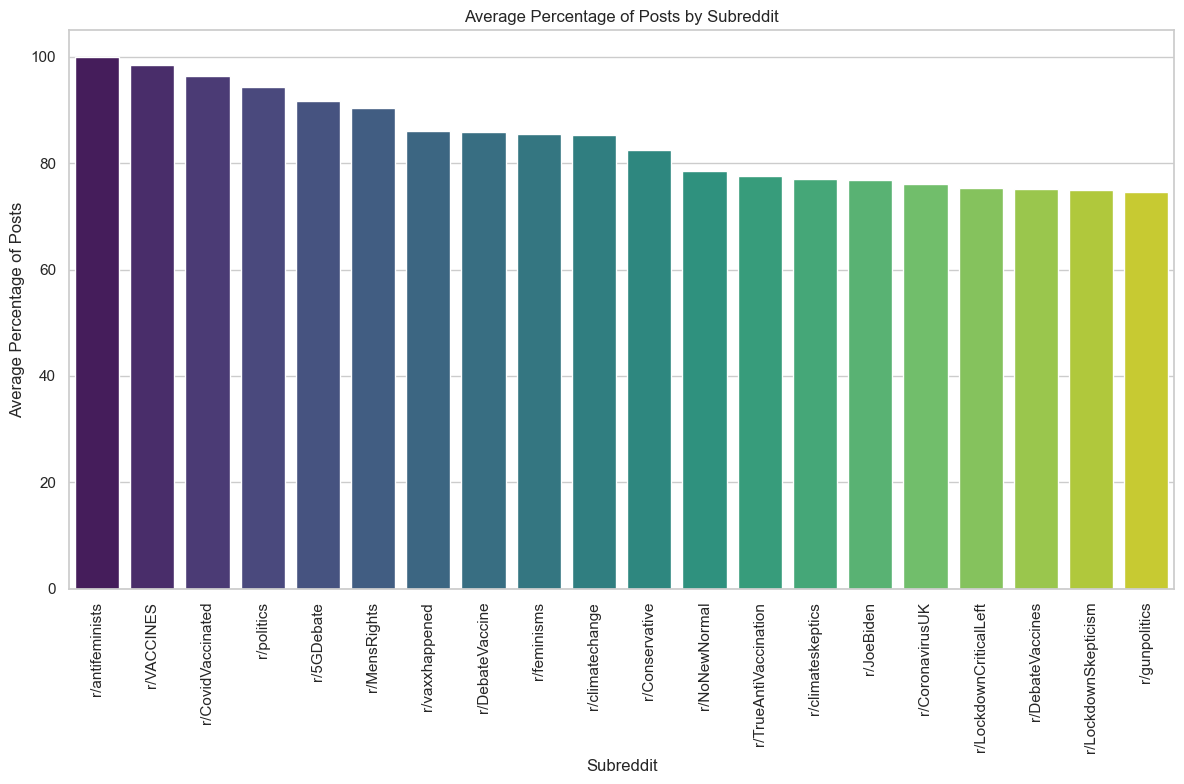

In [32]:
subreddit_averages = most_active_subreddits.groupby('subreddit')['percentage'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(
    x=subreddit_averages.index,
    y=subreddit_averages.values,
    palette="viridis"
)
plt.xlabel('Subreddit')
plt.ylabel('Average Percentage of Posts')
plt.title("Average Percentage of Posts by Subreddit")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [38]:
# Define the percentage bins
bins = list(range(0, 105, 5))  # 0 to 100 with steps of 5
labels = [f'{i}-{i+5}%' for i in bins[:-1]]
most_active_subreddits['percentage_bin'] = pd.cut(most_active_subreddits['percentage'], bins=bins, labels=labels, right=False)
bin_counts = most_active_subreddits['percentage_bin'].value_counts().sort_index()


In [39]:
bin_counts

percentage_bin
0-5%          0
5-10%         0
10-15%        0
15-20%        1
20-25%        1
25-30%        5
30-35%       15
35-40%       39
40-45%       49
45-50%       75
50-55%       76
55-60%       86
60-65%       89
65-70%      116
70-75%      133
75-80%      140
80-85%      158
85-90%      251
90-95%      384
95-100%    1512
Name: count, dtype: int64

C:\Users\petar\AppData\Local\Temp\ipykernel_22756\1197852936.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bin_counts.index, y=bin_counts.values, palette="viridis")


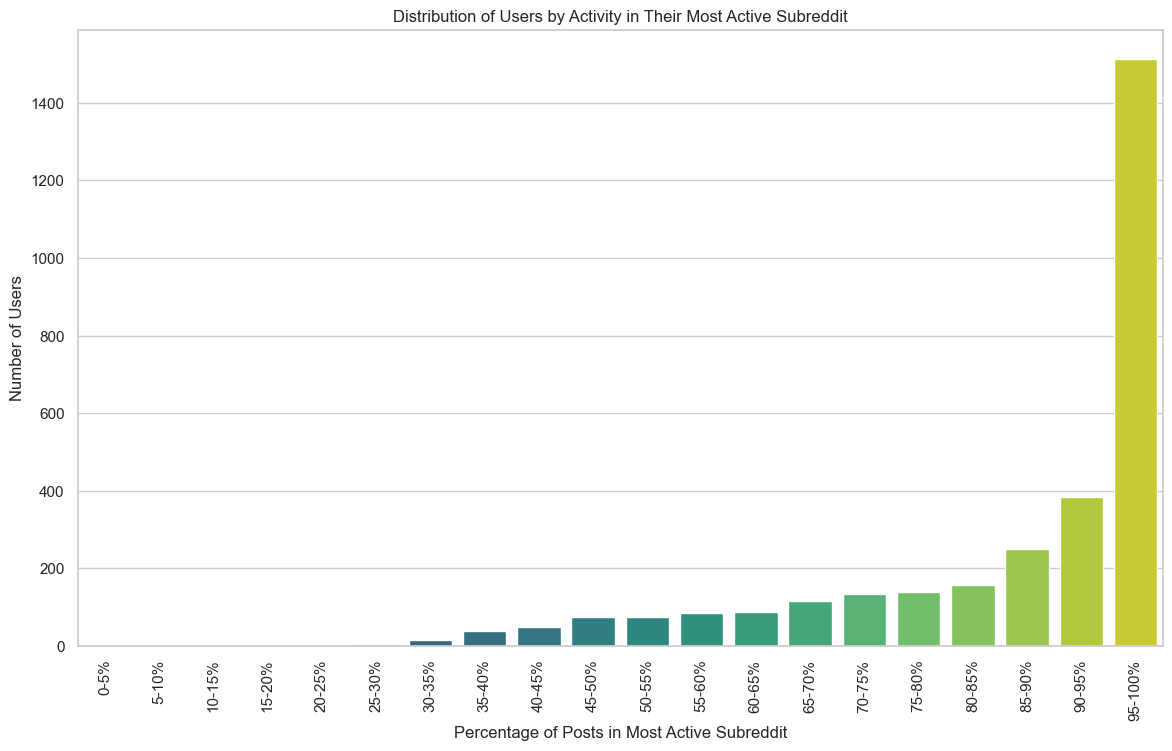

In [40]:
plt.figure(figsize=(14, 8))
sns.barplot(x=bin_counts.index, y=bin_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel('Percentage of Posts in Most Active Subreddit')
plt.ylabel('Number of Users')
plt.title('Distribution of Users by Activity in Their Most Active Subreddit')
plt.show()